# Intro to Neural Network Classification

In [72]:
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import itertools
import random

print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.datasets import fashion_mnist

TensorFlow version: 2.11.0


In [2]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)


In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### visualizing it

In [5]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "Label": y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


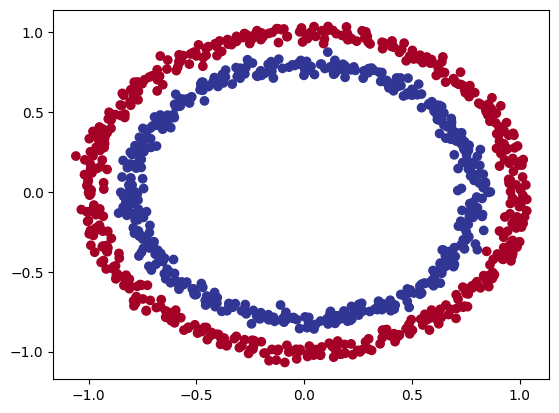

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [7]:
X.shape, y.shape


((1000, 2), (1000,))

In [12]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.8642 - accuracy: 0.4820
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.8017 - accuracy: 0.4780
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 2.1630 - accuracy: 0.4830
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7377 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.4940


In [13]:
model1.fit(X, y, epochs=200, verbose=0)
model1.evaluate(X, y)


32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [18]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(1),
     tf.keras.layers.Dense(1)])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model2.fit(X, y, epochs=100, verbose=2)


Epoch 1/100
32/32 - 1s - loss: 7.6302 - accuracy: 0.4940 - 779ms/epoch - 24ms/step
Epoch 2/100
32/32 - 0s - loss: 7.6246 - accuracy: 0.5000 - 40ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 7.6246 - accuracy: 0.5000 - 48ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 7.6246 - accuracy: 0.5000 - 51ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 7.6246 - accuracy: 0.5000 - 53ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 7.6246 - accuracy: 0.5000 - 55ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 7.6246 - accuracy: 0.5000 - 54ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 7.6246 - accuracy: 0.5000 - 52ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 7.6246 - accuracy: 0.5000 - 51ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 7.6246 - accuracy: 0.5000 - 50ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 7.6246 - accuracy: 0.5000 - 50ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 7.6246 - accuracy: 0.5000 - 52ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s

In [19]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model3.fit(X, y, epochs=100, verbose=2)


Epoch 1/100
32/32 - 1s - loss: 2.0599 - accuracy: 0.4590 - 792ms/epoch - 25ms/step
Epoch 2/100
32/32 - 0s - loss: 0.7168 - accuracy: 0.4900 - 59ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 0.6949 - accuracy: 0.4890 - 52ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6976 - accuracy: 0.5040 - 54ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.6983 - accuracy: 0.4780 - 51ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.6990 - accuracy: 0.4470 - 51ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.6960 - accuracy: 0.5070 - 54ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.6947 - accuracy: 0.5230 - 53ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.7001 - accuracy: 0.4990 - 52ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.6947 - accuracy: 0.4880 - 53ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.7033 - accuracy: 0.4800 - 54ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.6980 - accuracy: 0.4850 - 55ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s

In [22]:
def plot_decision_boundary(model, X, y):
    """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel(
    )]  # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[
            -1] > 1:  # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


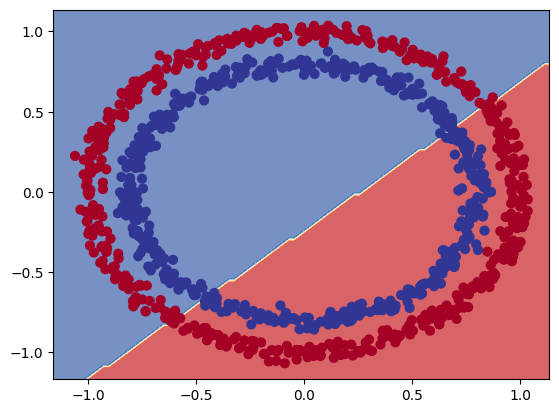

In [23]:
plot_decision_boundary(model3, X, y)


In [27]:
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)  # y = x + 100

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

model3.fit(tf.expand_dims(X_reg_train, axis=-1),
           y_reg_train,
           epochs=100,
           verbose=2)


Epoch 1/100
5/5 - 1s - loss: 323.3151 - mae: 323.3151 - 873ms/epoch - 175ms/step
Epoch 2/100
5/5 - 0s - loss: 216.5050 - mae: 216.5050 - 10ms/epoch - 2ms/step
Epoch 3/100
5/5 - 0s - loss: 110.3127 - mae: 110.3127 - 13ms/epoch - 3ms/step
Epoch 4/100
5/5 - 0s - loss: 49.4861 - mae: 49.4861 - 17ms/epoch - 3ms/step
Epoch 5/100
5/5 - 0s - loss: 76.8165 - mae: 76.8165 - 18ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 63.9053 - mae: 63.9053 - 18ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 42.9267 - mae: 42.9267 - 21ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 48.8168 - mae: 48.8168 - 17ms/epoch - 3ms/step
Epoch 9/100
5/5 - 0s - loss: 41.6444 - mae: 41.6444 - 19ms/epoch - 4ms/step
Epoch 10/100
5/5 - 0s - loss: 44.4272 - mae: 44.4272 - 34ms/epoch - 7ms/step
Epoch 11/100
5/5 - 0s - loss: 42.5417 - mae: 42.5417 - 22ms/epoch - 4ms/step
Epoch 12/100
5/5 - 0s - loss: 42.2166 - mae: 42.2166 - 25ms/epoch - 5ms/step
Epoch 13/100
5/5 - 0s - loss: 41.2834 - mae: 41.2834 - 31ms/epoch - 6ms/step

2/2 [==============================] - 0s 4ms/step


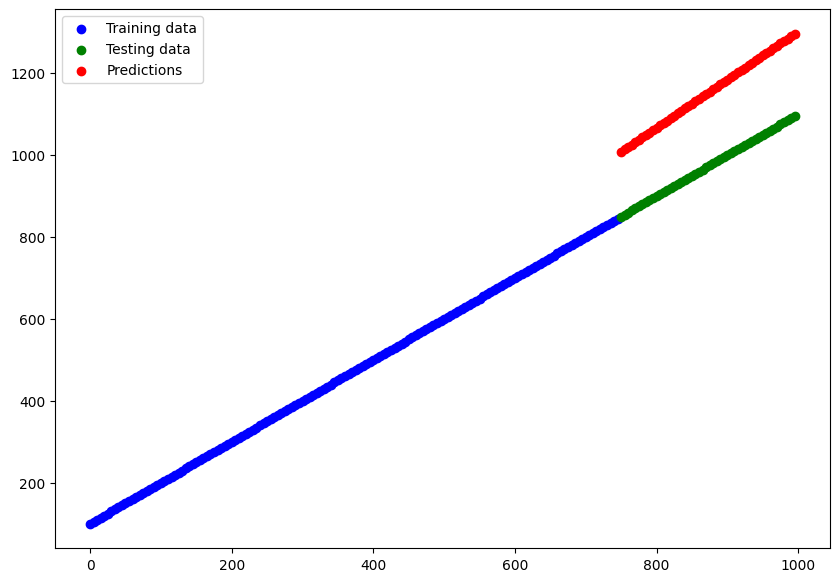

In [29]:
y_reg_preds = model3.predict(y_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend()

### Non_linearity

In [40]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

history = model4.fit(X, y, epochs=250, verbose=2)


Epoch 1/250
32/32 - 1s - loss: 3.8329 - accuracy: 0.4590 - 818ms/epoch - 26ms/step
Epoch 2/250
32/32 - 0s - loss: 3.4969 - accuracy: 0.4500 - 101ms/epoch - 3ms/step
Epoch 3/250
32/32 - 0s - loss: 3.3847 - accuracy: 0.4600 - 108ms/epoch - 3ms/step
Epoch 4/250
32/32 - 0s - loss: 3.2777 - accuracy: 0.4610 - 79ms/epoch - 2ms/step
Epoch 5/250
32/32 - 0s - loss: 3.1698 - accuracy: 0.4660 - 61ms/epoch - 2ms/step
Epoch 6/250
32/32 - 0s - loss: 3.1006 - accuracy: 0.4550 - 55ms/epoch - 2ms/step
Epoch 7/250
32/32 - 0s - loss: 3.0126 - accuracy: 0.4400 - 65ms/epoch - 2ms/step
Epoch 8/250
32/32 - 0s - loss: 2.9553 - accuracy: 0.4240 - 63ms/epoch - 2ms/step
Epoch 9/250
32/32 - 0s - loss: 2.9168 - accuracy: 0.4150 - 61ms/epoch - 2ms/step
Epoch 10/250
32/32 - 0s - loss: 2.7923 - accuracy: 0.4420 - 58ms/epoch - 2ms/step
Epoch 11/250
32/32 - 0s - loss: 2.7244 - accuracy: 0.4640 - 58ms/epoch - 2ms/step
Epoch 12/250
32/32 - 0s - loss: 2.6800 - accuracy: 0.4690 - 59ms/epoch - 2ms/step
Epoch 13/250
32/32 - 

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


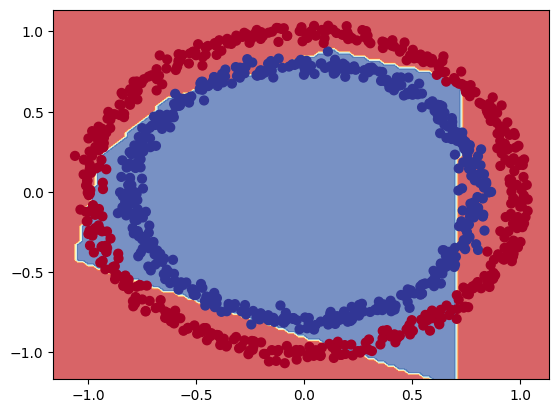

In [41]:
plot_decision_boundary(model4,X,y)

In [43]:
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

history = model5.fit(X, y, epochs=250, verbose=2)


Epoch 1/250
32/32 - 1s - loss: 0.7037 - accuracy: 0.5000 - 833ms/epoch - 26ms/step
Epoch 2/250
32/32 - 0s - loss: 0.7010 - accuracy: 0.4950 - 72ms/epoch - 2ms/step
Epoch 3/250
32/32 - 0s - loss: 0.6993 - accuracy: 0.4700 - 81ms/epoch - 3ms/step
Epoch 4/250
32/32 - 0s - loss: 0.6981 - accuracy: 0.3970 - 84ms/epoch - 3ms/step
Epoch 5/250
32/32 - 0s - loss: 0.6973 - accuracy: 0.4470 - 82ms/epoch - 3ms/step
Epoch 6/250
32/32 - 0s - loss: 0.6967 - accuracy: 0.4780 - 80ms/epoch - 2ms/step
Epoch 7/250
32/32 - 0s - loss: 0.6959 - accuracy: 0.4800 - 209ms/epoch - 7ms/step
Epoch 8/250
32/32 - 0s - loss: 0.6954 - accuracy: 0.4820 - 74ms/epoch - 2ms/step
Epoch 9/250
32/32 - 0s - loss: 0.6948 - accuracy: 0.4770 - 72ms/epoch - 2ms/step
Epoch 10/250
32/32 - 0s - loss: 0.6944 - accuracy: 0.4630 - 209ms/epoch - 7ms/step
Epoch 11/250
32/32 - 0s - loss: 0.6938 - accuracy: 0.4600 - 67ms/epoch - 2ms/step
Epoch 12/250
32/32 - 0s - loss: 0.6933 - accuracy: 0.4350 - 45ms/epoch - 1ms/step
Epoch 13/250
32/32 - 

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


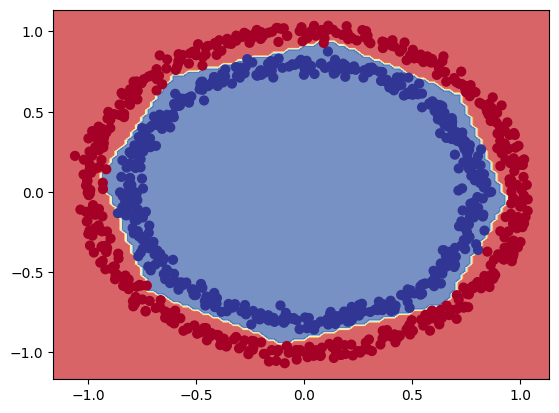

In [44]:
plot_decision_boundary(model5,X,y)

In [46]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [51]:
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

history = model6.fit(X_train, y_train, epochs=25, verbose=2)


Epoch 1/25
25/25 - 1s - loss: 0.6911 - accuracy: 0.5163 - 787ms/epoch - 31ms/step
Epoch 2/25
25/25 - 0s - loss: 0.6869 - accuracy: 0.5337 - 52ms/epoch - 2ms/step
Epoch 3/25
25/25 - 0s - loss: 0.6826 - accuracy: 0.5500 - 170ms/epoch - 7ms/step
Epoch 4/25
25/25 - 0s - loss: 0.6786 - accuracy: 0.5400 - 54ms/epoch - 2ms/step
Epoch 5/25
25/25 - 0s - loss: 0.6707 - accuracy: 0.5750 - 59ms/epoch - 2ms/step
Epoch 6/25
25/25 - 0s - loss: 0.6621 - accuracy: 0.5788 - 89ms/epoch - 4ms/step
Epoch 7/25
25/25 - 0s - loss: 0.6465 - accuracy: 0.6725 - 57ms/epoch - 2ms/step
Epoch 8/25
25/25 - 0s - loss: 0.6281 - accuracy: 0.6712 - 44ms/epoch - 2ms/step
Epoch 9/25
25/25 - 0s - loss: 0.6041 - accuracy: 0.7163 - 54ms/epoch - 2ms/step
Epoch 10/25
25/25 - 0s - loss: 0.5690 - accuracy: 0.7775 - 56ms/epoch - 2ms/step
Epoch 11/25
25/25 - 0s - loss: 0.5234 - accuracy: 0.8175 - 42ms/epoch - 2ms/step
Epoch 12/25
25/25 - 0s - loss: 0.4894 - accuracy: 0.7887 - 41ms/epoch - 2ms/step
Epoch 13/25
25/25 - 0s - loss: 0.4

In [52]:
model6.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.9650


[0.11716889590024948, 0.9649999737739563]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


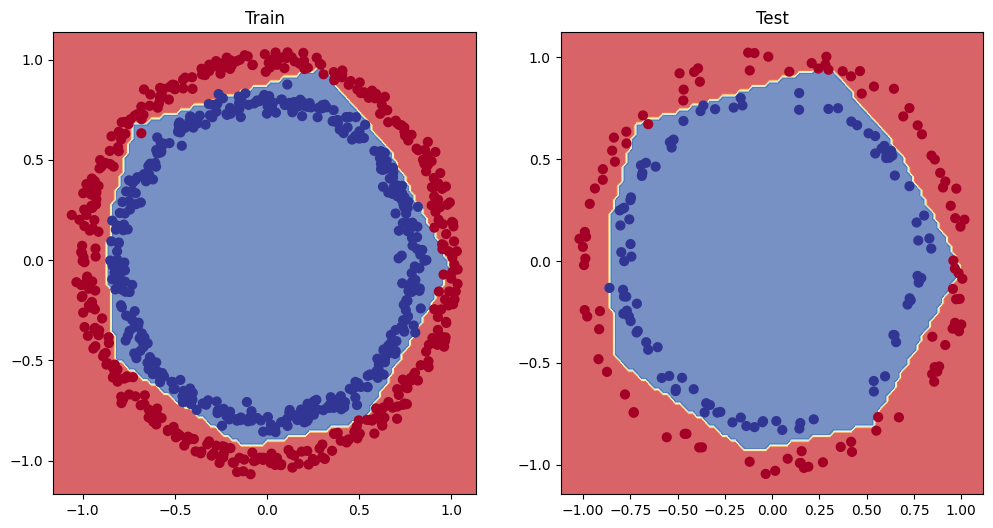

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model6, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model6, X=X_test, y=y_test)
plt.show()

In [54]:
tf.random.set_seed(42)

model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 20))

history = model7.fit(X_train,
                     y_train,
                     epochs=100,
                     verbose=2,
                     callbacks=[lr_scheduler])


Epoch 1/100
25/25 - 1s - loss: 0.7185 - accuracy: 0.5013 - lr: 1.0000e-04 - 739ms/epoch - 30ms/step
Epoch 2/100
25/25 - 0s - loss: 0.7177 - accuracy: 0.5013 - lr: 1.1220e-04 - 42ms/epoch - 2ms/step
Epoch 3/100
25/25 - 0s - loss: 0.7169 - accuracy: 0.5013 - lr: 1.2589e-04 - 45ms/epoch - 2ms/step
Epoch 4/100
25/25 - 0s - loss: 0.7160 - accuracy: 0.5013 - lr: 1.4125e-04 - 45ms/epoch - 2ms/step
Epoch 5/100
25/25 - 0s - loss: 0.7150 - accuracy: 0.5025 - lr: 1.5849e-04 - 42ms/epoch - 2ms/step
Epoch 6/100
25/25 - 0s - loss: 0.7141 - accuracy: 0.5038 - lr: 1.7783e-04 - 40ms/epoch - 2ms/step
Epoch 7/100
25/25 - 0s - loss: 0.7130 - accuracy: 0.5075 - lr: 1.9953e-04 - 44ms/epoch - 2ms/step
Epoch 8/100
25/25 - 0s - loss: 0.7120 - accuracy: 0.5050 - lr: 2.2387e-04 - 44ms/epoch - 2ms/step
Epoch 9/100
25/25 - 0s - loss: 0.7109 - accuracy: 0.5050 - lr: 2.5119e-04 - 63ms/epoch - 3ms/step
Epoch 10/100
25/25 - 0s - loss: 0.7098 - accuracy: 0.5013 - lr: 2.8184e-04 - 40ms/epoch - 2ms/step
Epoch 11/100
25/2

## finding the ideal learning rate

<AxesSubplot: xlabel='epochs'>

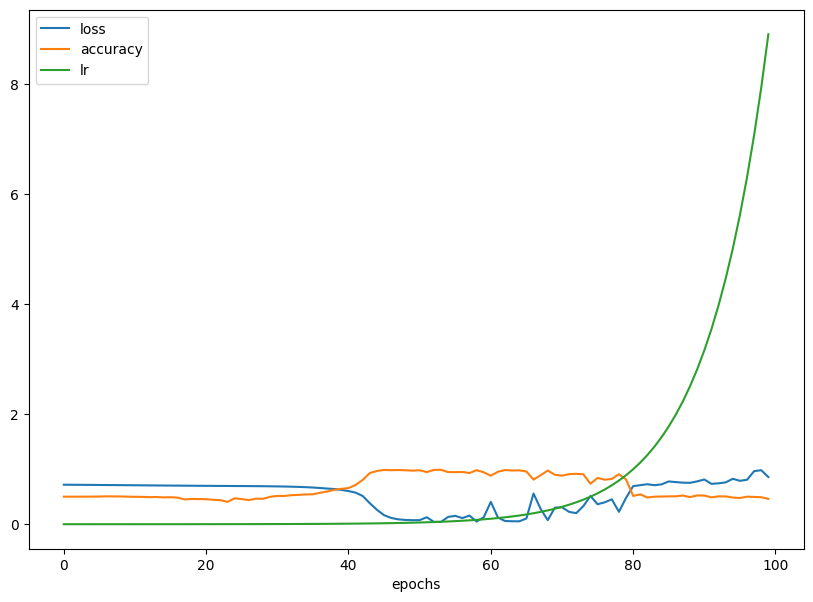

In [55]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. loss')

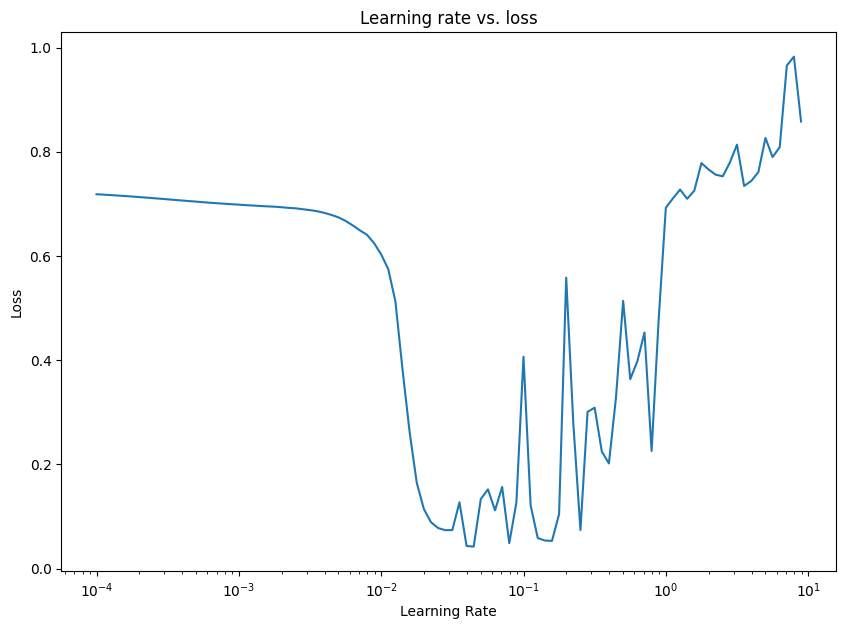

In [58]:
lrs = 1e-4 * (10** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [59]:
tf.random.set_seed(42)

model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics=["accuracy"])

history = model8.fit(
    X_train,
    y_train,
    epochs=20,
    verbose=2,
)


Epoch 1/20
25/25 - 1s - loss: 0.6839 - accuracy: 0.5813 - 667ms/epoch - 27ms/step
Epoch 2/20
25/25 - 0s - loss: 0.6692 - accuracy: 0.6037 - 47ms/epoch - 2ms/step
Epoch 3/20
25/25 - 0s - loss: 0.6409 - accuracy: 0.6488 - 39ms/epoch - 2ms/step
Epoch 4/20
25/25 - 0s - loss: 0.5976 - accuracy: 0.7125 - 47ms/epoch - 2ms/step
Epoch 5/20
25/25 - 0s - loss: 0.5538 - accuracy: 0.7525 - 39ms/epoch - 2ms/step
Epoch 6/20
25/25 - 0s - loss: 0.4783 - accuracy: 0.8025 - 42ms/epoch - 2ms/step
Epoch 7/20
25/25 - 0s - loss: 0.4247 - accuracy: 0.8525 - 45ms/epoch - 2ms/step
Epoch 8/20
25/25 - 0s - loss: 0.3599 - accuracy: 0.9013 - 53ms/epoch - 2ms/step
Epoch 9/20
25/25 - 0s - loss: 0.3040 - accuracy: 0.9350 - 111ms/epoch - 4ms/step
Epoch 10/20
25/25 - 0s - loss: 0.2464 - accuracy: 0.9588 - 76ms/epoch - 3ms/step
Epoch 11/20
25/25 - 0s - loss: 0.2017 - accuracy: 0.9712 - 67ms/epoch - 3ms/step
Epoch 12/20
25/25 - 0s - loss: 0.1551 - accuracy: 0.9825 - 43ms/epoch - 2ms/step
Epoch 13/20
25/25 - 0s - loss: 0.1

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


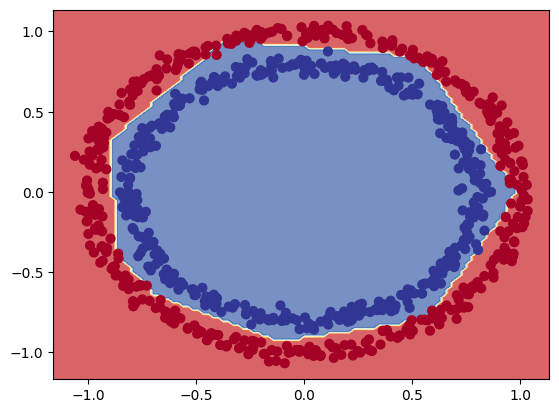

In [60]:
plot_decision_boundary(model8,X_train,y_train)

## creating confusion matrix

In [63]:
y_preds = model8.predict(X_test)
confusion_matrix(y_test,tf.round(y_preds))

7/7 [==============================] - 0s 1ms/step


array([[96,  5],
       [ 0, 99]])

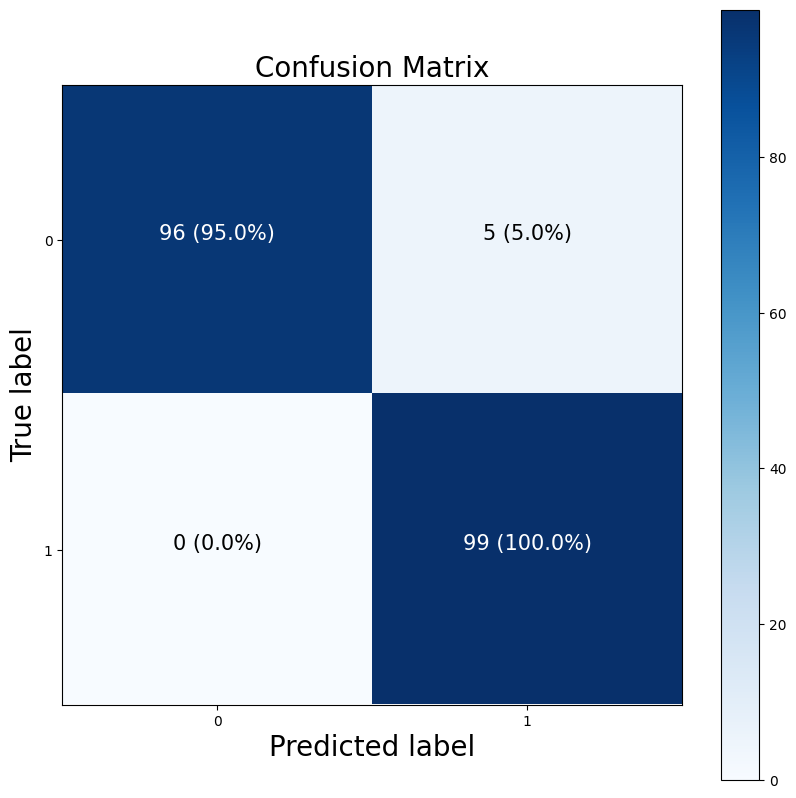

In [65]:
figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# working with a larger dataset

In [67]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [68]:
print(f"training sample: \n {train_data[0]}\n")
print(f"training label: \n {train_labels[0]}\n")

training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [70]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [71]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## ploting multiple random images

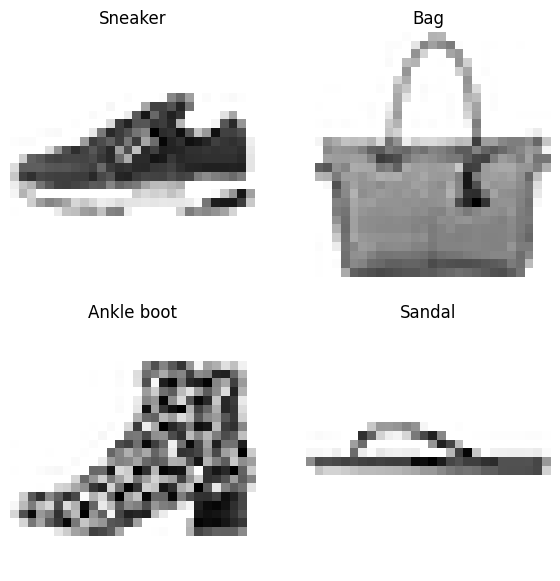

In [74]:
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

# building the multiclass model

In [76]:
tf.random.set_seed(42)

model9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history = model9.fit(
    train_data,
    train_labels,
    epochs=10,
    verbose=2,
    validation_data=(test_data,test_labels)
)

Epoch 1/10
1875/1875 - 4s - loss: 2.3254 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000 - 4s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 2s - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000 - 2s/epoch - 1ms/step
Epoch 3/10
1875/1875 - 2s - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000 - 2s/epoch - 1ms/step
Epoch 4/10
1875/1875 - 2s - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000 - 2s/epoch - 1ms/step
Epoch 5/10
1875/1875 - 2s - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000 - 2s/epoch - 1ms/step
Epoch 6/10
1875/1875 - 3s - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000 - 3s/epoch - 1ms/step
Epoch 7/10
1875/1875 - 3s - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000 - 3s/epoch - 1ms/step
Epoch 8/10
1875/1875 - 2s - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1000 - 2s/epoch - 1ms/step
Epoch 9/

In [77]:
model9.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_63 (Dense)            (None, 4)                 3140      
                                                                 
 dense_64 (Dense)            (None, 4)                 20        
                                                                 
 dense_65 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [78]:
train_data_norm = train_data /255.0
test_data_norm = test_data /255.0

In [80]:
tf.random.set_seed(42)

model10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

norm_history = model10.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2458 - accuracy: 0.5402 - val_loss: 0.8040 - val_accuracy: 0.7202
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7104 - accuracy: 0.7555 - val_loss: 0.6991 - val_accuracy: 0.7617
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6281 - accuracy: 0.7864 - val_loss: 0.6367 - val_accuracy: 0.7890
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5893 - accuracy: 0.7989 - val_loss: 0.6044 - val_accuracy: 0.8017
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5672 - accuracy: 0.8066 - val_loss: 0.6111 - val_accuracy: 0.7889
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5495 - accuracy: 0.8125 - val_loss: 0.5856 - val_accuracy: 0.8042
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5375 - accuracy: 0.8159 - val_loss: 0.5745 - val_accuracy:

<AxesSubplot: title={'center': 'norm'}>

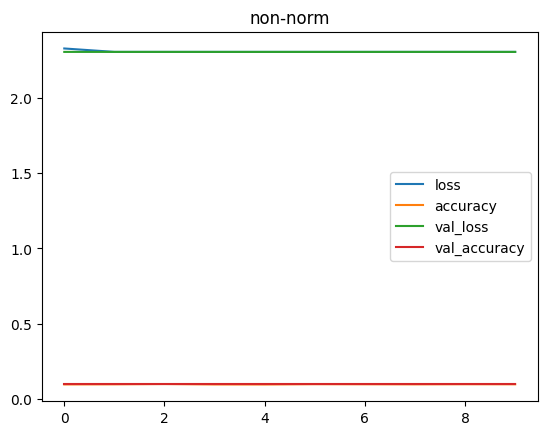

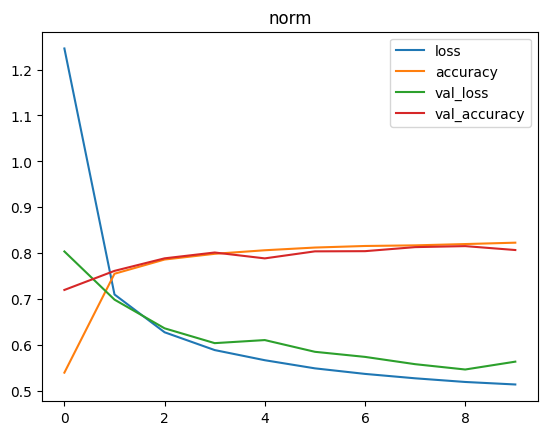

In [82]:
pd.DataFrame(history.history).plot(title="non-norm")
pd.DataFrame(norm_history.history).plot(title="norm")

In [84]:
tf.random.set_seed(42)

model11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model11.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm,test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2377 - accuracy: 0.5269 - val_loss: 0.8879 - val_accuracy: 0.6578 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7770 - accuracy: 0.7078 - val_loss: 0.7185 - val_accuracy: 0.7381 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6429 - accuracy: 0.7811 - val_loss: 0.6309 - val_accuracy: 0.7903 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5808 - accuracy: 0.8044 - val_loss: 0.5920 - val_accuracy: 0.8014 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5577 - accuracy: 0.8107 - val_loss: 0.5821 - val_accuracy: 0.8044 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5456 - accuracy: 0.8128 - val_loss: 0.6009 - val_accuracy: 0.7941 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'finding the ideal learning rate')

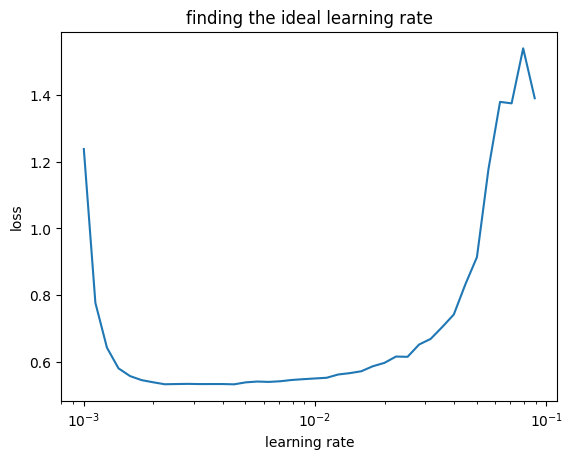

In [85]:
lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding the ideal learning rate")

In [86]:
10**-3

0.001

In [88]:
tf.random.set_seed(42)

model12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])


history12 = model12.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm,test_labels),
)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0627 - accuracy: 0.6396 - val_loss: 0.7315 - val_accuracy: 0.7305
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6513 - accuracy: 0.7705 - val_loss: 0.6521 - val_accuracy: 0.7758
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5820 - accuracy: 0.8000 - val_loss: 0.6074 - val_accuracy: 0.7884
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5550 - accuracy: 0.8111 - val_loss: 0.5850 - val_accuracy: 0.7967
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5418 - accuracy: 0.8128 - val_loss: 0.5914 - val_accuracy: 0.7940
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5315 - accuracy: 0.8166 - val_loss: 0.5826 - val_accuracy: 0.7964
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5242 - accuracy: 0.8201 - val_loss: 0.5911 - val_accuracy:

In [89]:

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
y_probs = model12.predict(test_data_norm)

In [96]:
class_names[tf.argmax(y_probs[0]).numpy()]

'Sandal'

## convert all probs into integers

In [97]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

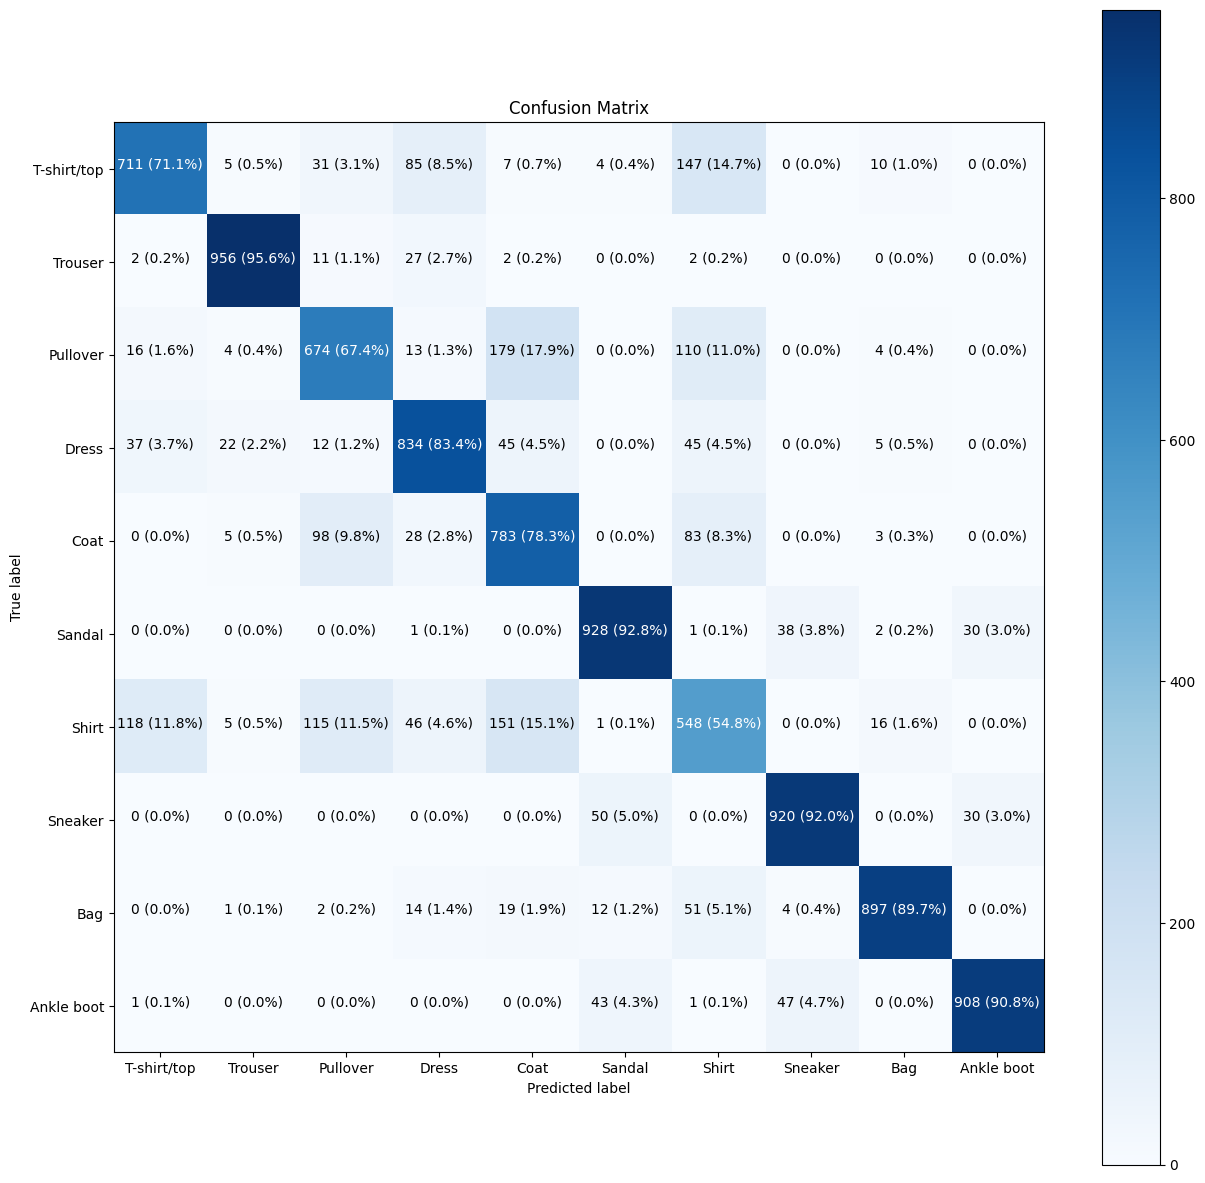

In [98]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [99]:
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 25ms/step


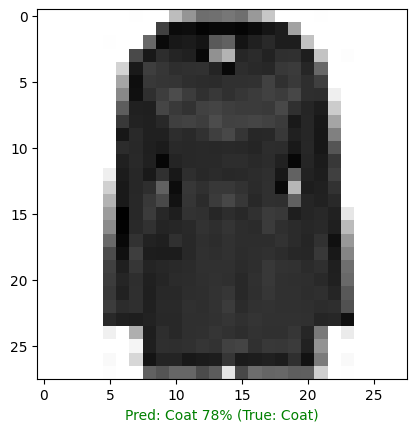

In [111]:
plot_random_image(model12,test_data_norm,test_labels,class_names)

# what patterns is the model actually learning

In [112]:
model12.layers

In [113]:
model12.layers[1]

In [114]:
weights, biases = model12.layers[1].get_weights()
weights, weights.shape

(array([[-0.21184622,  0.60476166, -0.5704844 ,  0.5540083 ],
        [-0.35603228, -0.6657152 ,  0.3267302 ,  0.50148845],
        [-0.9162638 , -0.38001177,  0.6244843 ,  0.48424354],
        ...,
        [-0.7740531 , -0.34411162,  0.14227395, -0.26436865],
        [-0.14335525, -0.03224959, -0.20965861, -0.7838715 ],
        [-0.36566   , -0.28377697,  0.21247026,  0.156094  ]],
       dtype=float32),
 (784, 4))

In [115]:
biases, biases.shape

(array([0.47602463, 0.08019719, 0.68760526, 0.28566742], dtype=float32), (4,))